In [1]:
import sys
sys.path.append("/home/ajag/tcdona3")
import math
from tcdona2.polatis import Polatis
from monitor import RoadmMonitor
from ila import ILA
from bbsource import BBS
import time     
import json
from utils import *
from teraflex import tflex

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9x1ibco6 because the default path (/home/ajag/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [8]:
pol = Polatis()
pol.login()

tf = tflex('10.10.10.92')

In [3]:
monitors = [RoadmMonitor('lumentum_4'), RoadmMonitor('lumentum_3'), RoadmMonitor('lumentum_7'), RoadmMonitor('lumentum_9'), RoadmMonitor('lumentum_8'), RoadmMonitor('lumentum_6'), RoadmMonitor('lumentum_5')]
monitor4 = monitors[0]
monitor3 = monitors[1]
monitor7 = monitors[2]
monitor9 = monitors[3]
monitor8 = monitors[4]
monitor6 = monitors[5]
monitor5 = monitors[6]

roadms = [monitor.roadm for monitor in monitors]
roadm4 = roadms[0]
roadm3 = roadms[1]
roadm7 = roadms[2]
roadm9 = roadms[3]
roadm8 = roadms[4]
roadm6 = roadms[5]
roadm5 = roadms[6]

operator_roadms = [roadm3, roadm7, roadm8, roadm9, roadm6, roadm5]
user_roadm = roadm4

Initializing ROADM Monitoring for lumentum_4...
Initializing ROADM Monitoring for lumentum_3...
Initializing ROADM Monitoring for lumentum_7...
Initializing ROADM Monitoring for lumentum_9...
Initializing ROADM Monitoring for lumentum_8...
Initializing ROADM Monitoring for lumentum_6...
Initializing ROADM Monitoring for lumentum_5...


In [4]:
pol.apply_patch_list(test1_patch_list)

arof_sig (231): -2.74 dBm ---> splitter_1_2x2_p1 (545): -3.08 dBm < 20.00 dBm
tf_1 (1): -4.85 dBm ---> splitter_2_2x2_p1 (561): -6.38 dBm < 20.00 dBm
splitter_1_2x2_p1 (225): -7.60 dBm ---> splitter_2_2x2_p2 (562): -8.27 dBm < 20.00 dBm
splitter_2_2x2_p1 (241): -8.01 dBm ---> roadm_4_p1 (427): -9.35 dBm < 20.00 dBm
tf_2 (2): -6.10 dBm ---> roadm_4_p2 (433): -7.91 dBm < 20.00 dBm
tf_3 (3): -6.06 dBm ---> splitter_3_2x2_p1 (563): -7.41 dBm < 20.00 dBm
splitter_1_2x2_p2 (226): -7.83 dBm ---> splitter_3_2x2_p2 (564): -7.88 dBm < 20.00 dBm
splitter_3_2x2_p1 (243): -8.65 dBm ---> roadm_4_p3 (434): -10.21 dBm < 20.00 dBm
roadm_4_line (214): 2.81 dBm ---> splitter_4_2x2_p1 (565): 1.71 dBm < 20.00 dBm
splitter_4_2x2_p1 (245): -2.73 dBm ---> fiber_temp_100m (401): -4.51 dBm < 20.00 dBm
fiber_temp_100m (81): -4.96 dBm ---> roadm_3_p1 (426): -6.45 dBm < 20.00 dBm
roadm_3_line (215): 1.56 dBm ---> fiber_7_510m (359): -0.09 dBm < 20.00 dBm
fiber_7_510m (39): -0.93 dBm ---> roadm_7_line (531): -2.63 

In [74]:
roadm4.edfa_config('booster', target_gain=17.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 15.0, 'target_gain': 18.0, 'target_gain_tilt': 0.0, 'input_power': -9.4, 'output_power': 8.68, 'voa_input_power': 1.35, 'voa_output_power': -4.35, 'voa_attenuation': 5.7}


In [80]:
roadm3.edfa_config('booster', target_gain=8.5, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 0.0, 'target_gain': 10.0, 'target_gain_tilt': 0.0, 'input_power': -6.24, 'output_power': 3.87, 'voa_input_power': 2.73, 'voa_output_power': -11.12, 'voa_attenuation': 13.83}


In [82]:
roadm3.edfa_config('preamp', target_gain=12.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 20.0, 'target_gain': 10.0, 'target_gain_tilt': 0.0, 'input_power': -6.07, 'output_power': 4.09, 'voa_input_power': 3.64, 'voa_output_power': -16.39, 'voa_attenuation': 20.04}


In [78]:
for roadm in roadms:
    roadm.disable_als(600)

In [83]:
pol.print_patch_table(test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	arof_sig	Out	231	-1.6
1	splitter_1_2x2_p1	In	545	-3.2
2	tf_1	Out	1	-4.83
3	splitter_2_2x2_p1	In	561	-6.42
4	splitter_1_2x2_p1	Out	225	-6.71
5	splitter_2_2x2_p2	In	562	-9.19
6	splitter_2_2x2_p1	Out	241	-7.73
7	roadm_4_p1	In	427	-9.37
8	tf_2	Out	2	-6.11
9	roadm_4_p2	In	433	-7.92
10	tf_3	Out	3	-6.06
11	splitter_3_2x2_p1	In	563	-7.41
12	splitter_1_2x2_p2	Out	226	-7.63
13	splitter_3_2x2_p2	In	564	-8.58
14	splitter_3_2x2_p1	Out	243	-8.49
15	roadm_4_p3	In	434	-10.04
16	roadm_4_line	Out	214	6.8
17	splitter_4_2x2_p1	In	565	5.68
18	splitter_4_2x2_p1	Out	245	1.26
19	fiber_temp_100m	In	401	-0.55
20	fiber_temp_100m	Out	81	-1.0
21	roadm_3_p1	In	426	-2.49
22	roadm_3_line	Out	215	1.98
23	fiber_7_510m	In	359	0.33
24	fiber_7_510m	Out	39	-0.51
25	roadm_7_line	In	531	-2.21
26	roadm_7_p1	Out	110	0.34
27	roadm_7_p1	In	430	-0.85
28	roadm_7_line	Out	211	1.46
29	fiber_19_12646m	In	375	0.16
30	fiber_19_12646m	Out	55	-3.08
31	roadm_8_line	In	530	-4.67
32	roadm_8_p1	Out	111	0.95

In [2]:
# This block only needs to execte once for the experiment. Caution: Do not run this many times

# for roadm in roadms:
#     roadm.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')
#     roadm.edfa_config('preamp', target_gain=10.0, control_mode='constant-gain')

# time.sleep(30)

# for roadm in roadms:
#     roadm.make_grid('both', list(range(1,96)))

# time.sleep(30)

# for roadm in roadms:
#     roadm.disable_als(600)

In [97]:
# Changing the TeraFlex configuration

# tf.change_configuration(line_port='1/2/n1', logical_interface='ot600', modulation='dp-64qam', target_power=-6.0, fec='sdfec-acacia27-7iterations', central_frequency=193100000)
# tf.change_configuration(line_port='1/1/n2', logical_interface='ot600', modulation='dp-64qam', target_power=-6.2, fec='sdfec-acacia27-7iterations', central_frequency=193000000)
# tf.change_configuration(line_port='1/1/n1', logical_interface='ot400', modulation='dp-64qam', target_power=-4.6, fec='sdfec-acacia27-7iterations', central_frequency=192900000)

30

In [10]:
for roadm in roadms:
    roadm.disable_als(600)

In [11]:
# user_grid = {(32):1, (34):2, (36):3}

# user_roadm_mux_conn = operator_flex_grid_mux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0)
# user_roadm.wss_delete_connection(1, 'all')
# user_roadm.wss_add_connections(user_roadm_mux_conn)

# time.sleep(5)

# user_roadm_demux_conn = operator_flex_grid_demux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0)
# user_roadm.wss_delete_connection(2, 'all')
# user_roadm.wss_add_connections(user_roadm_demux_conn)

In [12]:
# osaas_grid = {(30,31,32,33,34,35,36,37,38):1}

# for roadm in operator_roadms:

#     demux_conn_list = operator_flex_grid_demux_connections(roadm, osaas_grid, open_channels = wdm_channel_list, loss=0.0)
#     roadm.wss_delete_connection(2, 'all')
#     roadm.wss_add_connections(demux_conn_list)

# time.sleep(5)

# user_roadm_demux_conn = operator_flex_grid_demux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0, default_port=4)
# user_roadm.wss_delete_connection(2, 'all')
# user_roadm.wss_add_connections(user_roadm_demux_conn)

In [4]:
## Controlling Amp Powers - Should only use one by one

# roadm4.edfa_config('booster', target_gain=7.0, control_mode='constant-gain')
# roadm3.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')
# roadm7.edfa_config('booster', target_gain=7.0, control_mode='constant-gain')
# roadm8.edfa_config('booster', target_gain=6.5, control_mode='constant-gain')
# roadm9.edfa_config('booster', target_gain=10.7, control_mode='constant-gain')
# roadm6.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')
# roadm5.edfa_config('booster', target_gain=5.0, control_mode='constant-gain')
# roadm3.edfa_config('preamp', target_gain=12.0, control_mode='constant-gain')
# roadm4.edfa_config('booster', target_gain=13.0, control_mode='constant-gain')

In [10]:
pol.print_patch_table(patch_list=test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-4.84
1	splitter_1_2x2_p1	In	545	-6.52
2	arof_sig	Out	231	-28.4
3	splitter_1_2x2_p2	In	546	-48.28
4	tf_2	Out	2	-6.1
5	roadm_4_p2	In	433	-7.93


6	tf_3	Out	3	-6.04
7	roadm_4_p3	In	434	-7.63
8	splitter_1_2x2_p1	Out	225	-10.55
9	roadm_4_p1	In	427	-12.06
10	roadm_4_line	Out	214	4.07
11	fiber_temp_100m	In	401	2.72
12	fiber_temp_100m	Out	81	2.27
13	roadm_3_p1	In	426	0.82
14	roadm_3_line	Out	215	8.67
15	fiber_7_510m	In	359	7.01
16	fiber_7_510m	Out	39	6.19
17	roadm_7_line	In	531	4.53
18	roadm_7_p1	Out	110	7.06
19	roadm_7_p1	In	430	5.84
20	roadm_7_line	Out	211	8.15
21	fiber_19_12646m	In	375	6.82
22	fiber_19_12646m	Out	55	3.56
23	roadm_8_line	In	530	1.96
24	roadm_8_p1	Out	111	7.57
25	roadm_8_p1	In	431	6.1
26	roadm_8_line	Out	210	8.13
27	fiber_18_25220m	In	374	6.74
28	fiber_18_25220m	Out	54	0.18
29	roadm_9_line	In	529	-1.34
30	roadm_9_p1	Out	112	4.33
31	roadm_9_p1	In	432	2.84
32	roadm_9_line	Out	209	8.31
33	fiber_22_25332m	In	378	6.59
34	fiber_22_25332m	Out	58	0.12
35	roadm_6_line	In	532	-1.39
36	roadm_6_p1	Out	109	3.44
37	roadm_6_p1	In	429	2.21
38	roadm_6_line	Out	212	7.57
39	fiber_17_665m	In	373	6.33
40	fiber_17_665m	Out	53	5.41
41	fib

In [11]:
blocked_='false'
cur_conn1 = roadm4.WSSConnection(
        1, '1', 'in-service', blocked_,
        4101, 4201,
        str(192865.62),
        str(192934.37),
        '{:.2f}'.format(0.0),  'CH' + '1'
    )

cur_conn2 = roadm4.WSSConnection(
        1, '2', 'in-service', blocked_,
        4102, 4201,
        str(192956.25),
        str(193043.75),
        '{:.2f}'.format(0.0),  'CH' + '2'
    )

cur_conn3 = roadm4.WSSConnection(
        1, '3', 'in-service', blocked_,
        4103, 4201,
        str(193056.25),
        str(193143.75),
        '{:.2f}'.format(0.0),  'CH' + '3'
    )


conn_list = [cur_conn1, cur_conn2, cur_conn3]

In [12]:
roadm4.wss_delete_connection(1, 'all')
roadm4.wss_add_connections(conn_list)

In [60]:
blocked_='false'

#400 gbps 64qam is 62.5, we are doing 68.5

conn_arof1 = roadm4.WSSConnection(
        2, '1', 'in-service', blocked_,
        5101, 5204,
        str(192850.00),
        str(192875.00),
        '{:.2f}'.format(0.0),  'CH' + '1'
    )

# conn_coherent1 = roadm4.WSSConnection(
#         2, '1', 'in-service', blocked_,
#         5101, 5203,
#         str(192856.25),
#         str(192943.75),
#         '{:.2f}'.format(0.0),  'CH' + '1'
#     )

conn_coherent1 = roadm4.WSSConnection(
        2, '2', 'in-service', blocked_,
        5101, 5201,
        str(192875.00),
        str(192925.00),
        '{:.2f}'.format(0.0),  'CH' + '2'
    )

conn_arof2 = roadm4.WSSConnection(
        2, '3', 'in-service', blocked_,
        5101, 5204,
        str(192925.00),
        str(192950.00),
        '{:.2f}'.format(0.0),  'CH' + '3'
    )

cur_coherent2 = roadm4.WSSConnection(
        2, '4', 'in-service', blocked_,
        5101, 5202,
        str(192956.25),
        str(193043.75),
        '{:.2f}'.format(0.0),  'CH' + '4'
    )

cur_coherent3 = roadm4.WSSConnection(
        2, '5', 'in-service', blocked_,
        5101, 5203,
        str(193065.62),
        str(193134.37),
        '{:.2f}'.format(0.0),  'CH' + '5'
    )

conn_list = [conn_arof1, conn_coherent1, conn_arof2, cur_coherent2, cur_coherent3]

In [62]:
roadm4.wss_delete_connection(2, 'all')
roadm4.wss_add_connections(conn_list)

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-27 14:32:17.820307


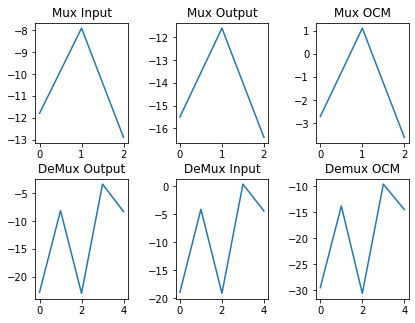

In [64]:
monitor4.plot_power('all', refresh=True, notebook=True)

In [21]:
roadm4.get_demux_connection_input_power()

[(1, -4.2), (2, -19.0), (3, 0.4), (4, -4.6)]